# Load DataSet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Eksplorasi Data

In [3]:
df.shape

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [6]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
#imbalance
df["Selector"].value_counts()

1    416
2    167
Name: Selector, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Gender"] = labelencoder.fit_transform(df["Gender"])

In [9]:
df["Gender"] = df["Gender"].astype(int)

In [10]:
df.duplicated().sum()

13

In [11]:
df.drop_duplicates(inplace=True)

# Pre Processing data

In [12]:
#ngisi missing value
df["A/G Ratio"].fillna(df["A/G Ratio"].mean(),axis=0,inplace=True)

In [13]:
X = df.drop("Selector",axis=1)
y = df["Selector"]

In [14]:
q1 = np.percentile(df,25)
q3 = np.percentile(df,75)
iqr = q3-q1

lower_bound = q1- 1.5 * iqr
upper_bound = q3 + 1.5 *iqr

data_no_outliers = df[(df>= lower_bound) & (df<= upper_bound)]

<Axes: >

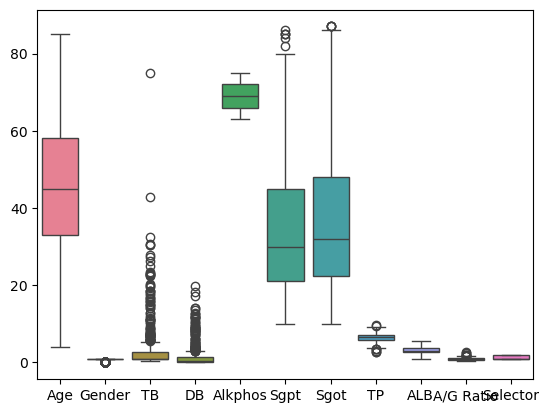

In [15]:
sns.boxplot(data_no_outliers)

In [16]:
from imblearn.over_sampling import SMOTE
scaler = SMOTE(k_neighbors=3, random_state=42)

X_resampled,y_resampled = scaler.fit_resample(X,y)

In [17]:
X_resampled

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0,0.700000,0.100000,187,16,18,6.800000,3.300000,0.900000
1,62,1,10.900000,5.500000,699,64,100,7.500000,3.200000,0.740000
2,62,1,7.300000,4.100000,490,60,68,7.000000,3.300000,0.890000
3,58,1,1.000000,0.400000,182,14,20,6.800000,3.400000,1.000000
4,72,1,3.900000,2.000000,195,27,59,7.300000,2.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...
807,60,1,1.503881,0.607762,197,62,84,6.750452,3.807762,1.288357
808,50,1,0.700000,0.200000,193,18,15,7.494649,4.200000,1.271605
809,36,0,1.395791,0.517475,348,151,80,8.221684,4.341263,1.080421
810,52,0,1.551447,0.851447,177,42,58,6.430639,3.816766,1.458383


In [18]:
y_resampled.value_counts()

1    406
2    406
Name: Selector, dtype: int64

In [19]:
X_resampled.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,44.155172,0.681034,2.655975,1.160839,268.876847,65.873153,87.353448,6.519576,3.217344,0.977546
std,16.075901,0.466363,5.365527,2.438927,215.872975,154.029614,246.504534,1.031285,0.751599,0.297450
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.000000,0.767345,0.200000,172.000000,22.000000,23.000000,5.900000,2.700000,0.800000
50%,45.000000,1.000000,0.900000,0.295345,198.000000,31.000000,34.000000,6.600000,3.200000,1.000000
75%,57.000000,1.000000,1.800000,0.800000,282.000000,52.250000,66.250000,7.200000,3.801349,1.112343
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


<Axes: >

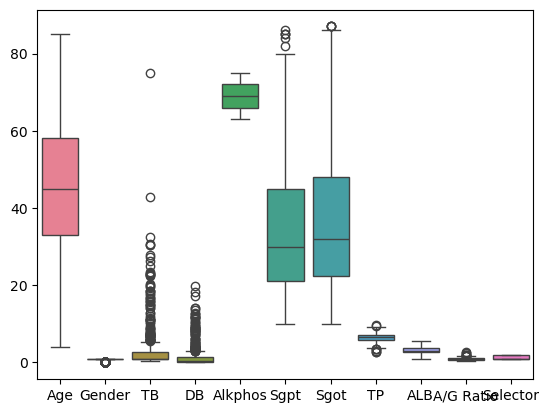

In [20]:
sns.boxplot(data_no_outliers)

In [21]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_normalisasi = scaler.fit_transform(X_resampled)

In [22]:
X_normalisasi

array([[ 0.8       , -1.        , -0.19367548, ...,  0.15384615,
         0.0907977 , -0.32016077],
       [ 0.68      ,  0.        ,  9.68377406, ...,  0.69230769,
         0.        , -0.832418  ],
       [ 0.68      ,  0.        ,  6.1976154 , ...,  0.30769231,
         0.0907977 , -0.35217685],
       ...,
       [-0.36      , -1.        ,  0.48011293, ...,  1.24744888,
         1.03624026,  0.25747613],
       [ 0.28      , -1.        ,  0.63084664, ..., -0.13027792,
         0.56000975,  1.46756324],
       [-1.6       ,  0.        ,  0.03903646, ...,  0.92188   ,
         0.5525238 , -0.16132581]])

# ML

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_normalisasi,y_resampled,test_size=0.2,random_state=42)

              precision    recall  f1-score   support

           1       0.78      0.72      0.75        72
           2       0.79      0.84      0.81        91

    accuracy                           0.79       163
   macro avg       0.78      0.78      0.78       163
weighted avg       0.78      0.79      0.78       163

0.7852760736196319


<Axes: >

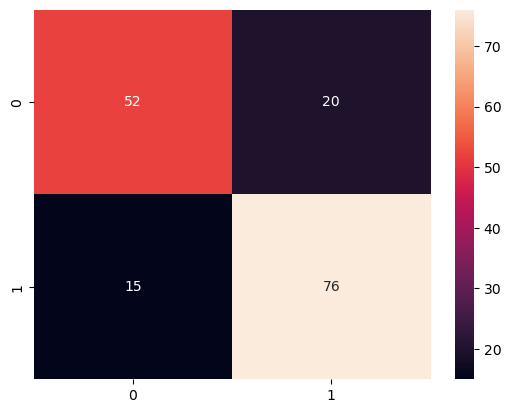

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = GradientBoostingClassifier(random_state=42, max_depth=100, max_features=10)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)

print(report)
print(acc)

sns.heatmap(conf,annot= True)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)

report = classification_report(y_test,y_pred)
print(report)
print(acc)


              precision    recall  f1-score   support

           1       0.78      0.72      0.75        72
           2       0.79      0.84      0.81        91

    accuracy                           0.79       163
   macro avg       0.78      0.78      0.78       163
weighted avg       0.78      0.79      0.78       163

0.7852760736196319


In [27]:
from sklearn.linear_model import LogisticRegression
modelLr = LogisticRegression()
modelLr.fit(X_train,y_train)
prediction = modelLr.predict(X_test)
report = classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           1       0.74      0.58      0.65        72
           2       0.72      0.84      0.77        91

    accuracy                           0.72       163
   macro avg       0.73      0.71      0.71       163
weighted avg       0.73      0.72      0.72       163



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(modelLr,X_normalisasi,y_resampled,cv=kf)
y_pred = cross_val_predict(model, X, y, cv=5)

# Menampilkan skor untuk setiap fold
print("Cross-Validation Scores:", score)
print("Cross-Validation predict:", y_pred)

# Menampilkan rata-rata skor
print("Rata-rata Cross-Validation Score:", score.mean())
print("Rata-rata Cross-Validation pred:", y_pred.mean())


Cross-Validation Scores: [0.73170732 0.68292683 0.7037037  0.77777778 0.7037037  0.7037037
 0.72839506 0.71604938 0.72839506 0.7037037 ]
Cross-Validation predict: [2 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1
 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 2 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1
 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 1 1 1 1 1 1
 1 1 2 2 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 2 1 2 1 1 2 1
 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 2 1 1 1 2 1 2 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 2 1 2 2 2 1 1 1 1 2
 2 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model klasifikasi (ganti model sesuai kebutuhan)
model = RandomForestClassifier()

# Menghitung F1-score menggunakan K-Fold Cross-Validation
f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')  # Menggunakan f1_macro untuk kasus multikelas

# Menampilkan nilai F1-score pada setiap fold
print("F1-score pada Setiap Fold:", f1_scores)

# Menampilkan rata-rata F1-score
print("Rata-rata Cross-Validation F1-score:", f1_scores.mean())

F1-score pada Setiap Fold: [0.53097449 0.66814016 0.65491453 0.51983152 0.60573123]
Rata-rata Cross-Validation F1-score: 0.5959183856725433
